# 8장. 자연어 처리
### 설치
- JDK, JAVA_HOME 셋팅
- KoNLPy : **pip install konlpy**
- JPype1 : **pip install JPype1-py3**
- stopwords, punkt 설치 : cmd 창에서
    * python
    * \>>> import nltk
    * \>>> nltk.download()
        - All Packages에서 punkt, stopwords 설치
    * \>>> nltkexit()
- WordCloud 설치 : **pip install wordcloud**

## 8-2 한글 자연어 처리 기초
#### 꼬꼬마

In [1]:
from konlpy.tag import Kkma
kkma = Kkma()

In [2]:
kkma.sentences('한국어 분석을 시작합니다 재미있어요~~')

['한국어 분석을 시작합니다', '재미있어요~~']

In [3]:
kkma.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석']

In [4]:
kkma.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

#### 한나눔

In [5]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [6]:
hannanum.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [7]:
hannanum.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~']

In [8]:
hannanum.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'N'),
 ('분석', 'N'),
 ('을', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~', 'S')]

#### 트위터

In [45]:
from konlpy.tag import Twitter
t = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
t.nouns('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '시작']

In [11]:
t.morphs('한국어 분석을 시작합니다 재미있어요~~')

['한국어', '분석', '을', '시작', '합니다', '재미있어요', '~~']

In [12]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

In [46]:
from konlpy.tag import Okt
t = Okt()

In [16]:
t.pos('한국어 분석을 시작합니다 재미있어요~~')

[('한국어', 'Noun'),
 ('분석', 'Noun'),
 ('을', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~', 'Punctuation')]

## 8.3 워드 클라우드

In [51]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [48]:
text = open('data/08. alice.txt').read()
alice_mask = np.array(Image.open('data/08. alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [49]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
%matplotlib inline

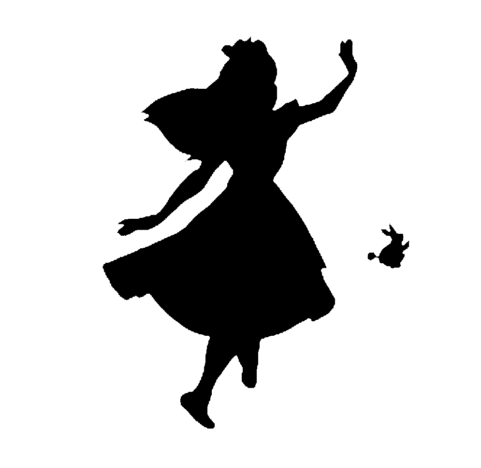

In [50]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

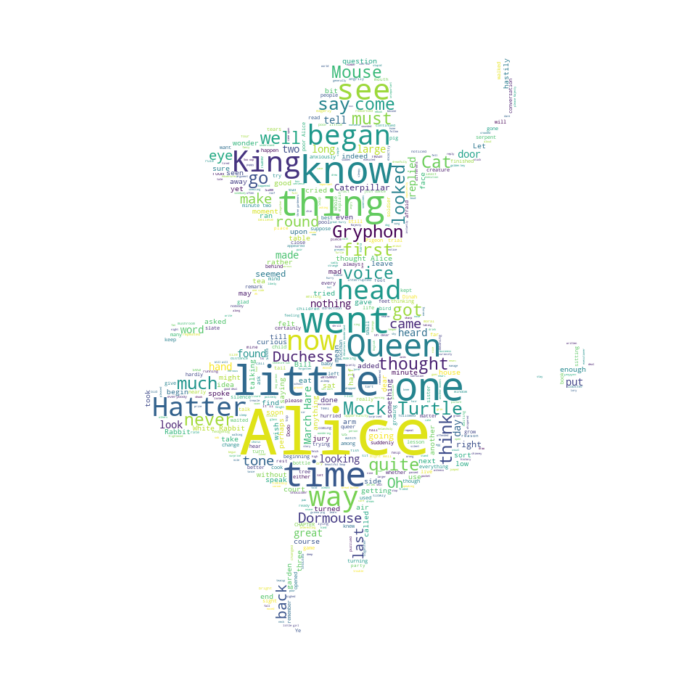

In [53]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
text = open('data/08. a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('data/08. stormtrooper_mask.png'))

In [55]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [56]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [57]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

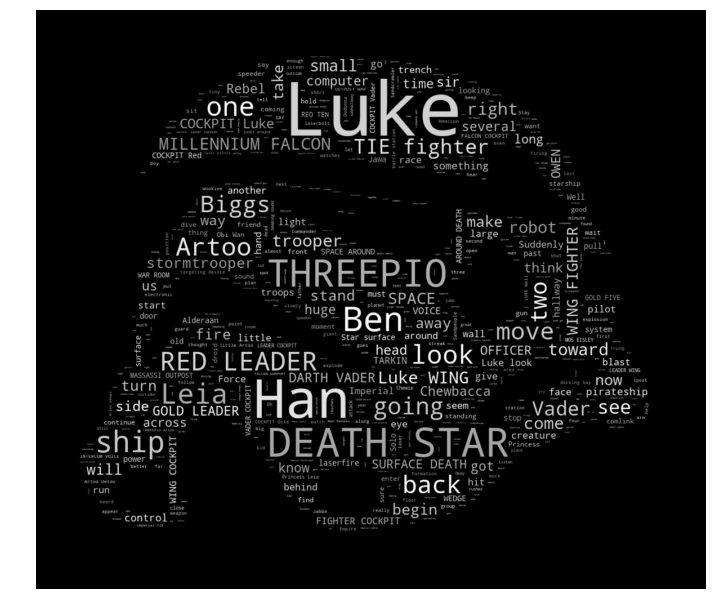

In [58]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

## 8-4 육아휴직관련 법안에 대한 분석
#### (대한민국 국회 제 1809890호 의안)

In [59]:
# Natural Language Toolkit
import nltk

In [60]:
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [61]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [62]:
tokens_ko = t.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

In [63]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

In [64]:
print(len(ko.tokens))       # returns number of tokens (document length)
print(len(set(ko.tokens)))  # returns number of unique tokens
ko.vocab() 

735
250


FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

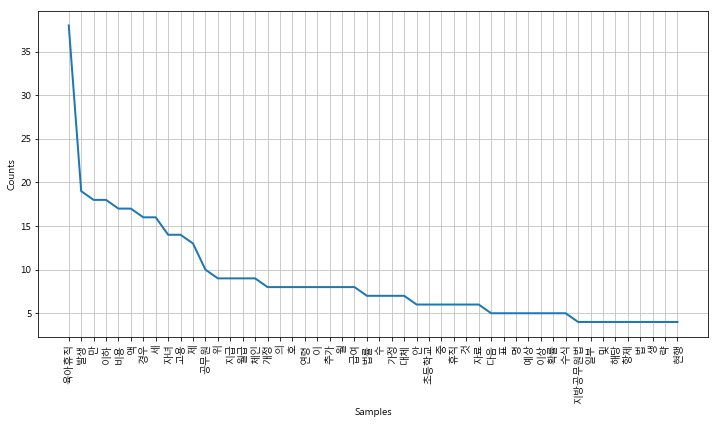

In [65]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [37]:
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번',
                      '호','을','이','다','만','로','가','를']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

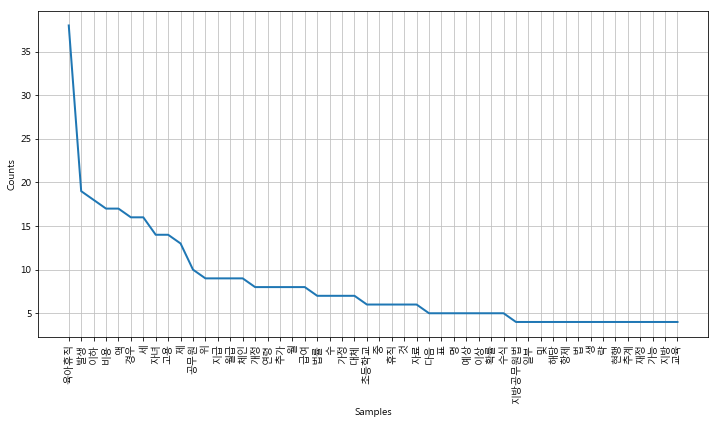

In [38]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)     # Plot sorted frequency of top 50 tokens
plt.show()

In [39]:
# '초등학교'가 문서 내에서 몇 번 언급되었는지
ko.count('초등학교')

6

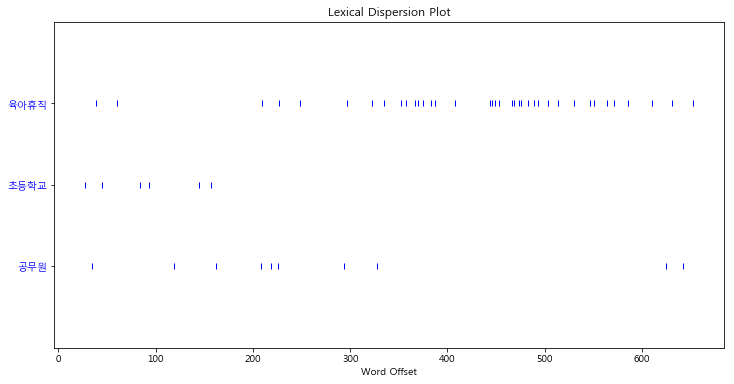

In [40]:
# 원하는 단어의 문서 내 개략적인 위치와 분량 확인
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

In [41]:
# 원하는 단어의 주변부 단어 확인
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [42]:
# 문서내에서 사용된 연어(collocations)
ko.collocations()

초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


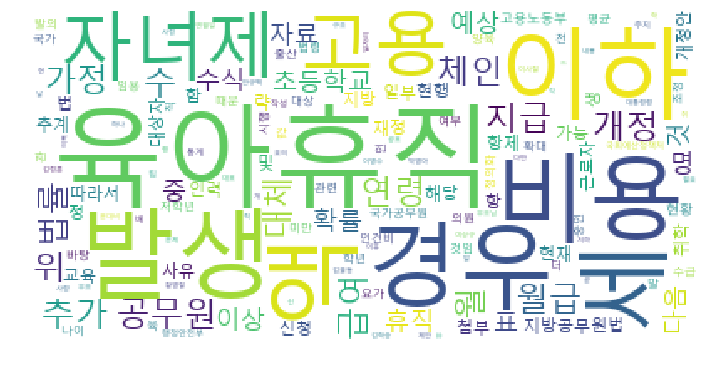

In [44]:
data = ko.vocab().most_common(150)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 8-8 여자 친구 선물 고르기

In [71]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [72]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [73]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    유인나 시계   까르벵   여친 생일선물   까르벵 시계   토파즈 반지   파니니백   여친 화풀어주기     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  생리기간 여친선물 줄만한거   2018.12.18.   여친이 생리기간만 되면 너무 힘들어하는데 그럴때 줄만한 여친선물 있을까요ㅠㅠ? 간단한거라도 좋아용..생리기간에 힘내라고 여친선물 주고싶어서요   답변 생리기간에는 예민해서 여친선물로 여자친구가 조아하는걸로 주는게 좋을거 같아요 생리기간 잘 이겨내도록 좋은 여친선물 고르세요!      ',
 '  질문  빼빼로데이 여친 선물 추천 어떤게 좋을까요?   2018.10.15.   어떻게 선택을 해야 할지를 모르는데 빼빼로데이 여친선물 추천 부탁드립니다. 처음 여친을 사귀는 거라 어떤것을 해야 할지를 모르겠네요.   답변 빼빼로데이 여친 선물 추천 때문에 질문을 주신거 같으신데요.. 찾아보시면은 빼빼로데이 여친 선물 추천 드리고... 빼빼로데이 다가오면은 여친 선물 하려고 준비를 하는...      ',
 '  질문  여친 선물로 꽃   2019.07.24.   여자친구에게 선물로 꽃을 줄려 합니다 무슨 꽃이 좋을까요? 너무 비싼 거 제외해주세요 너무 부담스럽지 않을 만큼이면 좋겠습니다   답변 안녕하세요 수제가죽 브랜드 톰크롬입니다. 여자친구분에게 튤립을 선물하면 좋을것같습니다. 꽃말은 튤립의 꽃말은 사랑의 고백, 매혹, 영원한 애정, 경솔 입니다. 꽃...      ',
 '  질문  50일 여친선물   2019.07.01.   곧50되서 여친한테 선물주려고 하는데 뭐줄까요 생일때도 편지써주고 놀러가긴했

In [74]:
from tqdm import tqdm_notebook

present_candi_text = []
for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [75]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구목걸이   스킨케어   여자30대선물   20대여자친구선물   여자친구선물뷰티디바이스   선물   여자친구생일선물   여자근력운동   여자친구100일선물   10대여자친구선물     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  20대여자친구선물 뭘 줘야 좋아할까요?   3일 전   20대여자친구선물 검색해도 다 거기서 거기인 선물들만 뜨니깐 여기다 질문 남겨봅니다. 새로운걸 선물해주고 싶은데 20대여자친구선물로 어떤게 좋을까요?   답변 안녕하세요 20대여자친구선물 어떤걸로 준비할지 고민하시네요 제가 좋은것 알려드리겠습니다 20대여자친구선물로 준비했는데 너무 좋아하네요 좋은것 알려드릴게요 ~      ',
 '  질문  여자친구선물   2019.06.27.   안녕하세요 여자친구선물 고민 하고 있어요 이번에 100일이라서 선물을 사주고 싶은데... 악세사리 같은건 잘 안하고 음악 듣는걸 좋아해요 여자친구선물 추천 부탁드려요   답변 여자친구선물 고민 중이신가보네요 악세사리 같은 거 잘... 무난한 여자친구선물 이라면 음향기기 아닐까... 다양한 브랜드 제품들이 있는데요 여자친구선물 하기 좋을만한...      ',
 '  질문  여자친구 선물추천 실용적인거요!   2019.07.19.   여자친구 선물추천 실용적인 거로 부탁드립니다. 꽃 이런 건 보니까 별로 안 좋아하더라구요. 진짜 쓸 수 있는 실용적이지만 하기 괜찮은 여자친구 선물추천 부탁합니다.   답변 저는 여자친구 선물추천으로 라노아의 퓨어플라워 스킨... 것도 여자친구 선물추천하는 큰 이유입니다ㅋㅋㅋ... 천연화장품세트 여자친구 선물추천으로 

In [76]:
len(present_candi_text)

1300

In [77]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [78]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '목걸이',
 '스킨',
 '케어',
 '여자',
 '30',
 '대',
 '선물',
 '20',
 '대',
 '여자친구',
 '선물',
 '여자친구',
 '선물',
 '뷰티',
 '디바이스',
 '선물',
 '여자친구',
 '생일',
 '선물',
 '여자',
 '근력',
 '운동',
 '여자친구',
 '100일',
 '선물',
 '10',
 '대',
 '여자친구',
 '선물',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '20',
 '대',
 '여자친구',
 '선물',
 '뭘',
 '줘야',
 '좋아할까',
 '요',
 '?',
 '3일',
 '전',
 '20',
 '대',
 '여자친구',
 '선물',
 '검색',
 '해도',
 '다',
 '거기',
 '서',
 '거기',
 '인',
 '선물',
 '들',
 '만',
 '뜨니깐',
 '여기',
 '다',
 '질문',
 '남겨',
 '봅니다',
 '.',
 '새로운',
 '걸',


In [79]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

84600
356


In [80]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 6500),
 ('여자친구', 6400),
 ('.', 3400),
 ('...', 2600),
 ('로', 2100),
 ('대', 1500),
 ('20', 1500),
 ('답변', 1300),
 ('질문', 1200),
 ('가', 1000),
 ('추천', 1000),
 ('거', 1000),
 ('에', 900),
 ('는', 700),
 ('걸', 700),
 ('고민', 700),
 ('적', 700),
 (',', 700),
 ('검색', 500),
 ('단어', 500),
 ('를', 500),
 ('?', 500),
 ('다', 500),
 ('좋은', 500),
 ('것', 500),
 ('이', 500),
 ('화장품', 500),
 ('의', 400),
 ('합니다', 400),
 ('요', 400),
 ('인', 400),
 ('좋을까요', 400),
 ('안녕하세요', 400),
 ('알려', 400),
 ('을', 400),
 ('실용', 400),
 ('으로', 400),
 ('입니다', 400),
 ('입력', 300),
 ('한', 300),
 ('하는', 300),
 ('여자', 300),
 ('해주고', 300),
 ('어떤', 300),
 ('너무', 300),
 ('악세사리', 300),
 ('안', 300),
 ('중', 300),
 ('하기', 300),
 ('!', 300),
 ('이런', 300),
 ('괜찮은', 300),
 ('저', 300),
 ('도', 300),
 ('뭐', 300),
 ('2019.05', 300),
 ('줄', 300),
 ('??', 300),
 ('은', 300),
 ('지갑', 300),
 ('기억', 300),
 ('많이', 300),
 ('하나', 200),
 ('이상', 200),
 ('포함', 200),
 ('때', 200),
 ('해서', 200),
 ('연관검색어', 200),
 ('목걸이', 200),
 ('스킨', 200),
 ('생일', 200),

In [81]:
ko.similar('여자친구')

이라서


In [91]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도','인',
              '좋','1','는','로','으로','2','것','은','다',',','니다','대','들','걸','해서',
              '2019','들','데','..','의','때','겠','고','게','네요','한','일','할','많이',
              '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ','알려',
              '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려','좋은',
              '지','있','못','후','중','줄','6','과','어떤','기본','!!','!','??','입니다',
              '단어','선물해','라고','중요한','합','가요','....','보이','네','무지','안',
              '2019.05','2019.06','100일','27','됩니다','너무','이런','괜찮은','저','검색',
              '해주고','적','안녕하세요','하기','연관검색어','싶은데','보','니까','거기','서',
              '합니다','좋을까요','기억','준비','하고','이번','아닐까','있는데요','2019.07',
              '건','주는','있으면','면','이나','해주세요','대한','해주면','살','된','때문',
              '남을만한','상세','정확히','일치','/','("','")','반드시','(+)','(-)','(,)',
              '반드시','기','기','결과','줄이고자','하실','여러','개','쉼표','하세요','고민']

In [92]:
tokens_ko = [each_word for each_word in tokens_ko 
                            if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 6500),
 ('여자친구', 6400),
 ('추천', 1000),
 ('화장품', 500),
 ('실용', 400),
 ('입력', 300),
 ('여자', 300),
 ('악세사리', 300),
 ('지갑', 300),
 ('포함', 200),
 ('목걸이', 200),
 ('스킨', 200),
 ('생일', 200),
 ('브랜드', 200),
 ('부탁', 200),
 ('반지', 200),
 ('걱정', 200),
 ('30만원', 200),
 ('후반쯤', 200),
 ('40초', 200),
 ('가방', 200),
 ('녹음기', 200),
 ('향수', 200),
 ('문서', 100),
 ('문장', 100),
 ('제외', 100),
 ('본', 100),
 ('범위', 100),
 ('사용', 100),
 ('구분', 100),
 ('도움말', 100),
 ('케어', 100),
 ('30', 100),
 ('뷰티', 100),
 ('디바이스', 100),
 ('근력', 100),
 ('운동', 100),
 ('닫기', 100),
 ('일간', 100),
 ('유지', 100),
 ('다시', 100),
 ('보시겠습니까', 100),
 ('열기', 100),
 ('뭘', 100),
 ('줘야', 100),
 ('좋아할까', 100),
 ('3일', 100),
 ('전', 100),
 ('해도', 100),
 ('만', 100)]

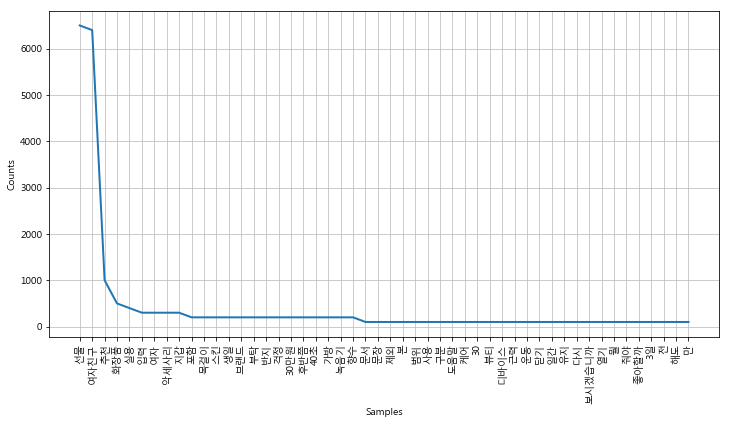

In [93]:
plt.figure(figsize=(12,6))
ko.plot(50) 
plt.show()

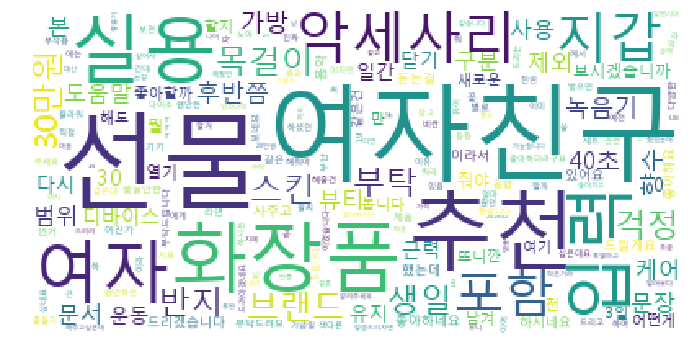

In [94]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [95]:
mask = np.array(Image.open('data/08. heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [96]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

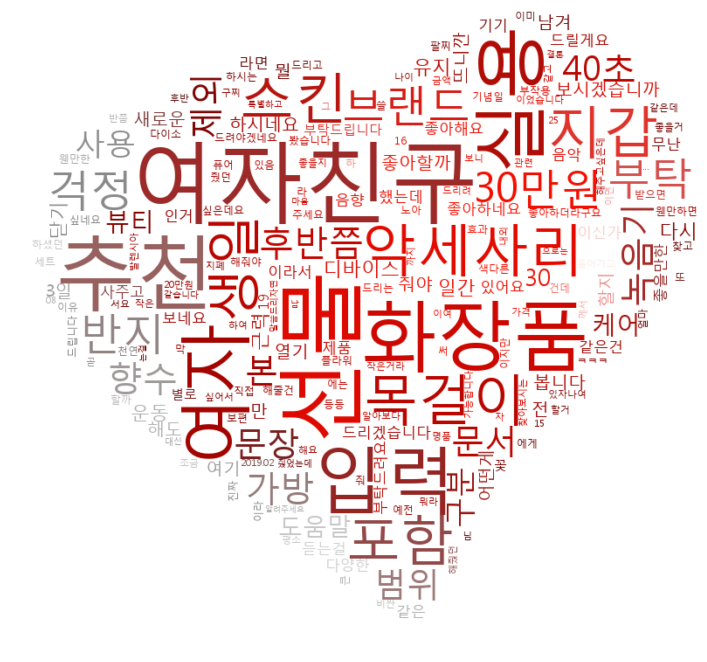

In [97]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

#### word2vec

In [98]:
import gensim
from gensim.models import word2vec

In [99]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r= []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 뭘 주다 좋아하다 요 3일 전 20 대 여자친구 선물 검색 하다 다 거기 거기 선물 들 뜨다 여기 질문 남기다 보다 새롭다 걸 선물 해주다 싶다 20 대 여자친구 선물 어떻다 좋다 답변 안녕하다 20 대 여자친구 선물 어떤 것 준비 하다 고민 하다 제 좋다 것 알다 드리다 20 대 여자친구 선물 준비 하다 너무 좋아하다 좋다 것 알다 드리다
질문 여자친구 선물 2019.06 27 안녕하다 여자친구 선물 고민 하다 있다 이번 100일 이라서 선물 사주다 싶다 악세사리 같다 자다 안 음악 듣다 좋아하다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 중 보다 악세사리 같다 거 자다 무난 여자친구 선물 이 라면 음향 기기 아니다 다양하다 브랜드 제품 들 있다 여자친구 선물 하다 좋다
질문 여자친구 선물 추천 실용 적 요 2019.07 19 여자친구 선물 추천 실용 적 거 부탁드리다 꽃 이렇다 건 보 별로 안 좋아하다 진짜 쓸다 수 있다 실용 적 하다 괜찮다 여자친구 선물 추천 부탁 하다 답변 저 여자친구 선물 추천 노아 퓨어 플라워 스킨 것 여자친구 선물 추천 하 크다 이유 이다 ㅋㅋㅋ 천연 화장품 세트 여자친구 선물 추천 드리다 싶다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 

질문 20 대다 여자친구 선물 어떻다 걸 해주다 하다 요 2019.06 10 이번 좀 색다르다 걸 해주다 싶다 웬만하다 20 대다 여자친구 선물 해주다 다 이미 줄 건 다 주다 보다 20 대다 여자친구 선물 실용 적 거 있다 추천 해주다 답변 20 대다 여자친구 선물 대한 답변 드리다 20 대다 여자친구 선물 보편 적 것 반지 팔찌 목걸이 등등 이상 20 대다 여자친구 선물 대한 답변 이다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 30만원 후반쯤 40초 2019.07 15 여자친구 선물 30만원 후반쯤 40초 반쯤 지갑 하나 선물 해주다 브랜드 괜찮다 거 지폐 조금 들어가다 작다 지갑 있다 여자친구 가방 작다 추천 좀 부탁 하다 답변 그 가격 이면 발렌시아 구찌 가능하다
질문 여자친구 선물 기억 남다 것 2019.02 25 여자친구 선물 고민 중 이다 금액 20만원 내외 좋다 같다 나이 20 대 후반 이다 여자친구 선물 명품 지갑 특별하다 기억 남다 여자친구 선물 추천 해주다 답변 여자친구 선물 기억 남다 말씀드리다 저 마음 여자친구 선물 녹음기 주다 결론 적 주다 여자친구 선물 녹음기 괜찮다 거 같다 대신
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 아니다 싶다 그렇다 여자친구 선물 답변 마치다 하다
질문 안녕하다 20 살 여자친구 선물 때문 2019.05 27 안녕하다 20 살 여자친구 선물 때문 

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 뭘 주다 좋아하다 요 3일 전 20 대 여자친구 선물 검색 하다 다 거기 거기 선물 들 뜨다 여기 질문 남기다 보다 새롭다 걸 선물 해주다 싶다 20 대 여자친구 선물 어떻다 좋다 답변 안녕하다 20 대 여자친구 선물 어떤 것 준비 하다 고민 하다 제 좋다 것 알다 드리다 20 대 여자친구 선물 준비 하다 너무 좋아하다 좋다 것 알다 드리다
질문 여자친구 선물 2019.06 27 안녕하다 여자친구 선물 고민 하다 있다 이번 100일 이라서 선물 사주다 싶다 악세사리 같다 자다 안 음악 듣다 좋아하다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 중 보다 악세사리 같다 거 자다 무난 여자친구 선물 이 라면 음향 기기 아니다 다양하다 브랜드 제품 들 있다 여자친구 선물 하다 좋다
질문 여자친구 선물 추천 실용 적 요 2019.07 19 여자친구 선물 추천 실용 적 거 부탁드리다 꽃 이렇다 건 보 별로 안 좋아하다 진짜 쓸다 수 있다 실용 적 하다 괜찮다 여자친구 선물 추천 부탁 하다 답변 저 여자친구 선물 추천 노아 퓨어 플라워 스킨 것 여자친구 선물 추천 하 크다 이유 이다 ㅋㅋㅋ 천연 화장품 세트 여자친구 선물 추천 드리다 싶다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 

질문 20 대다 여자친구 선물 어떻다 걸 해주다 하다 요 2019.06 10 이번 좀 색다르다 걸 해주다 싶다 웬만하다 20 대다 여자친구 선물 해주다 다 이미 줄 건 다 주다 보다 20 대다 여자친구 선물 실용 적 거 있다 추천 해주다 답변 20 대다 여자친구 선물 대한 답변 드리다 20 대다 여자친구 선물 보편 적 것 반지 팔찌 목걸이 등등 이상 20 대다 여자친구 선물 대한 답변 이다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 30만원 후반쯤 40초 2019.07 15 여자친구 선물 30만원 후반쯤 40초 반쯤 지갑 하나 선물 해주다 브랜드 괜찮다 거 지폐 조금 들어가다 작다 지갑 있다 여자친구 가방 작다 추천 좀 부탁 하다 답변 그 가격 이면 발렌시아 구찌 가능하다
질문 여자친구 선물 기억 남다 것 2019.02 25 여자친구 선물 고민 중 이다 금액 20만원 내외 좋다 같다 나이 20 대 후반 이다 여자친구 선물 명품 지갑 특별하다 기억 남다 여자친구 선물 추천 해주다 답변 여자친구 선물 기억 남다 말씀드리다 저 마음 여자친구 선물 녹음기 주다 결론 적 주다 여자친구 선물 녹음기 괜찮다 거 같다 대신
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 아니다 싶다 그렇다 여자친구 선물 답변 마치다 하다
질문 안녕하다 20 살 여자친구 선물 때문 2019.05 27 안녕하다 20 살 여자친구 선물 때문 

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 뭘 주다 좋아하다 요 3일 전 20 대 여자친구 선물 검색 하다 다 거기 거기 선물 들 뜨다 여기 질문 남기다 보다 새롭다 걸 선물 해주다 싶다 20 대 여자친구 선물 어떻다 좋다 답변 안녕하다 20 대 여자친구 선물 어떤 것 준비 하다 고민 하다 제 좋다 것 알다 드리다 20 대 여자친구 선물 준비 하다 너무 좋아하다 좋다 것 알다 드리다
질문 여자친구 선물 2019.06 27 안녕하다 여자친구 선물 고민 하다 있다 이번 100일 이라서 선물 사주다 싶다 악세사리 같다 자다 안 음악 듣다 좋아하다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 중 보다 악세사리 같다 거 자다 무난 여자친구 선물 이 라면 음향 기기 아니다 다양하다 브랜드 제품 들 있다 여자친구 선물 하다 좋다
질문 여자친구 선물 추천 실용 적 요 2019.07 19 여자친구 선물 추천 실용 적 거 부탁드리다 꽃 이렇다 건 보 별로 안 좋아하다 진짜 쓸다 수 있다 실용 적 하다 괜찮다 여자친구 선물 추천 부탁 하다 답변 저 여자친구 선물 추천 노아 퓨어 플라워 스킨 것 여자친구 선물 추천 하 크다 이유 이다 ㅋㅋㅋ 천연 화장품 세트 여자친구 선물 추천 드리다 싶다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 

질문 20 대다 여자친구 선물 어떻다 걸 해주다 하다 요 2019.06 10 이번 좀 색다르다 걸 해주다 싶다 웬만하다 20 대다 여자친구 선물 해주다 다 이미 줄 건 다 주다 보다 20 대다 여자친구 선물 실용 적 거 있다 추천 해주다 답변 20 대다 여자친구 선물 대한 답변 드리다 20 대다 여자친구 선물 보편 적 것 반지 팔찌 목걸이 등등 이상 20 대다 여자친구 선물 대한 답변 이다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 30만원 후반쯤 40초 2019.07 15 여자친구 선물 30만원 후반쯤 40초 반쯤 지갑 하나 선물 해주다 브랜드 괜찮다 거 지폐 조금 들어가다 작다 지갑 있다 여자친구 가방 작다 추천 좀 부탁 하다 답변 그 가격 이면 발렌시아 구찌 가능하다
질문 여자친구 선물 기억 남다 것 2019.02 25 여자친구 선물 고민 중 이다 금액 20만원 내외 좋다 같다 나이 20 대 후반 이다 여자친구 선물 명품 지갑 특별하다 기억 남다 여자친구 선물 추천 해주다 답변 여자친구 선물 기억 남다 말씀드리다 저 마음 여자친구 선물 녹음기 주다 결론 적 주다 여자친구 선물 녹음기 괜찮다 거 같다 대신
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 아니다 싶다 그렇다 여자친구 선물 답변 마치다 하다
질문 안녕하다 20 살 여자친구 선물 때문 2019.05 27 안녕하다 20 살 여자친구 선물 때문 

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 뭘 주다 좋아하다 요 3일 전 20 대 여자친구 선물 검색 하다 다 거기 거기 선물 들 뜨다 여기 질문 남기다 보다 새롭다 걸 선물 해주다 싶다 20 대 여자친구 선물 어떻다 좋다 답변 안녕하다 20 대 여자친구 선물 어떤 것 준비 하다 고민 하다 제 좋다 것 알다 드리다 20 대 여자친구 선물 준비 하다 너무 좋아하다 좋다 것 알다 드리다
질문 여자친구 선물 2019.06 27 안녕하다 여자친구 선물 고민 하다 있다 이번 100일 이라서 선물 사주다 싶다 악세사리 같다 자다 안 음악 듣다 좋아하다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 중 보다 악세사리 같다 거 자다 무난 여자친구 선물 이 라면 음향 기기 아니다 다양하다 브랜드 제품 들 있다 여자친구 선물 하다 좋다
질문 여자친구 선물 추천 실용 적 요 2019.07 19 여자친구 선물 추천 실용 적 거 부탁드리다 꽃 이렇다 건 보 별로 안 좋아하다 진짜 쓸다 수 있다 실용 적 하다 괜찮다 여자친구 선물 추천 부탁 하다 답변 저 여자친구 선물 추천 노아 퓨어 플라워 스킨 것 여자친구 선물 추천 하 크다 이유 이다 ㅋㅋㅋ 천연 화장품 세트 여자친구 선물 추천 드리다 싶다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 

질문 20 대다 여자친구 선물 어떻다 걸 해주다 하다 요 2019.06 10 이번 좀 색다르다 걸 해주다 싶다 웬만하다 20 대다 여자친구 선물 해주다 다 이미 줄 건 다 주다 보다 20 대다 여자친구 선물 실용 적 거 있다 추천 해주다 답변 20 대다 여자친구 선물 대한 답변 드리다 20 대다 여자친구 선물 보편 적 것 반지 팔찌 목걸이 등등 이상 20 대다 여자친구 선물 대한 답변 이다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 30만원 후반쯤 40초 2019.07 15 여자친구 선물 30만원 후반쯤 40초 반쯤 지갑 하나 선물 해주다 브랜드 괜찮다 거 지폐 조금 들어가다 작다 지갑 있다 여자친구 가방 작다 추천 좀 부탁 하다 답변 그 가격 이면 발렌시아 구찌 가능하다
질문 여자친구 선물 기억 남다 것 2019.02 25 여자친구 선물 고민 중 이다 금액 20만원 내외 좋다 같다 나이 20 대 후반 이다 여자친구 선물 명품 지갑 특별하다 기억 남다 여자친구 선물 추천 해주다 답변 여자친구 선물 기억 남다 말씀드리다 저 마음 여자친구 선물 녹음기 주다 결론 적 주다 여자친구 선물 녹음기 괜찮다 거 같다 대신
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 아니다 싶다 그렇다 여자친구 선물 답변 마치다 하다
질문 안녕하다 20 살 여자친구 선물 때문 2019.05 27 안녕하다 20 살 여자친구 선물 때문 

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 뭘 주다 좋아하다 요 3일 전 20 대 여자친구 선물 검색 하다 다 거기 거기 선물 들 뜨다 여기 질문 남기다 보다 새롭다 걸 선물 해주다 싶다 20 대 여자친구 선물 어떻다 좋다 답변 안녕하다 20 대 여자친구 선물 어떤 것 준비 하다 고민 하다 제 좋다 것 알다 드리다 20 대 여자친구 선물 준비 하다 너무 좋아하다 좋다 것 알다 드리다
질문 여자친구 선물 2019.06 27 안녕하다 여자친구 선물 고민 하다 있다 이번 100일 이라서 선물 사주다 싶다 악세사리 같다 자다 안 음악 듣다 좋아하다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 중 보다 악세사리 같다 거 자다 무난 여자친구 선물 이 라면 음향 기기 아니다 다양하다 브랜드 제품 들 있다 여자친구 선물 하다 좋다
질문 여자친구 선물 추천 실용 적 요 2019.07 19 여자친구 선물 추천 실용 적 거 부탁드리다 꽃 이렇다 건 보 별로 안 좋아하다 진짜 쓸다 수 있다 실용 적 하다 괜찮다 여자친구 선물 추천 부탁 하다 답변 저 여자친구 선물 추천 노아 퓨어 플라워 스킨 것 여자친구 선물 추천 하 크다 이유 이다 ㅋㅋㅋ 천연 화장품 세트 여자친구 선물 추천 드리다 싶다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 

질문 20 대다 여자친구 선물 어떻다 걸 해주다 하다 요 2019.06 10 이번 좀 색다르다 걸 해주다 싶다 웬만하다 20 대다 여자친구 선물 해주다 다 이미 줄 건 다 주다 보다 20 대다 여자친구 선물 실용 적 거 있다 추천 해주다 답변 20 대다 여자친구 선물 대한 답변 드리다 20 대다 여자친구 선물 보편 적 것 반지 팔찌 목걸이 등등 이상 20 대다 여자친구 선물 대한 답변 이다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 30만원 후반쯤 40초 2019.07 15 여자친구 선물 30만원 후반쯤 40초 반쯤 지갑 하나 선물 해주다 브랜드 괜찮다 거 지폐 조금 들어가다 작다 지갑 있다 여자친구 가방 작다 추천 좀 부탁 하다 답변 그 가격 이면 발렌시아 구찌 가능하다
질문 여자친구 선물 기억 남다 것 2019.02 25 여자친구 선물 고민 중 이다 금액 20만원 내외 좋다 같다 나이 20 대 후반 이다 여자친구 선물 명품 지갑 특별하다 기억 남다 여자친구 선물 추천 해주다 답변 여자친구 선물 기억 남다 말씀드리다 저 마음 여자친구 선물 녹음기 주다 결론 적 주다 여자친구 선물 녹음기 괜찮다 거 같다 대신
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 아니다 싶다 그렇다 여자친구 선물 답변 마치다 하다
질문 안녕하다 20 살 여자친구 선물 때문 2019.05 27 안녕하다 20 살 여자친구 선물 때문 

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 뭘 주다 좋아하다 요 3일 전 20 대 여자친구 선물 검색 하다 다 거기 거기 선물 들 뜨다 여기 질문 남기다 보다 새롭다 걸 선물 해주다 싶다 20 대 여자친구 선물 어떻다 좋다 답변 안녕하다 20 대 여자친구 선물 어떤 것 준비 하다 고민 하다 제 좋다 것 알다 드리다 20 대 여자친구 선물 준비 하다 너무 좋아하다 좋다 것 알다 드리다
질문 여자친구 선물 2019.06 27 안녕하다 여자친구 선물 고민 하다 있다 이번 100일 이라서 선물 사주다 싶다 악세사리 같다 자다 안 음악 듣다 좋아하다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 중 보다 악세사리 같다 거 자다 무난 여자친구 선물 이 라면 음향 기기 아니다 다양하다 브랜드 제품 들 있다 여자친구 선물 하다 좋다
질문 여자친구 선물 추천 실용 적 요 2019.07 19 여자친구 선물 추천 실용 적 거 부탁드리다 꽃 이렇다 건 보 별로 안 좋아하다 진짜 쓸다 수 있다 실용 적 하다 괜찮다 여자친구 선물 추천 부탁 하다 답변 저 여자친구 선물 추천 노아 퓨어 플라워 스킨 것 여자친구 선물 추천 하 크다 이유 이다 ㅋㅋㅋ 천연 화장품 세트 여자친구 선물 추천 드리다 싶다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 

질문 20 대다 여자친구 선물 어떻다 걸 해주다 하다 요 2019.06 10 이번 좀 색다르다 걸 해주다 싶다 웬만하다 20 대다 여자친구 선물 해주다 다 이미 줄 건 다 주다 보다 20 대다 여자친구 선물 실용 적 거 있다 추천 해주다 답변 20 대다 여자친구 선물 대한 답변 드리다 20 대다 여자친구 선물 보편 적 것 반지 팔찌 목걸이 등등 이상 20 대다 여자친구 선물 대한 답변 이다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 30만원 후반쯤 40초 2019.07 15 여자친구 선물 30만원 후반쯤 40초 반쯤 지갑 하나 선물 해주다 브랜드 괜찮다 거 지폐 조금 들어가다 작다 지갑 있다 여자친구 가방 작다 추천 좀 부탁 하다 답변 그 가격 이면 발렌시아 구찌 가능하다
질문 여자친구 선물 기억 남다 것 2019.02 25 여자친구 선물 고민 중 이다 금액 20만원 내외 좋다 같다 나이 20 대 후반 이다 여자친구 선물 명품 지갑 특별하다 기억 남다 여자친구 선물 추천 해주다 답변 여자친구 선물 기억 남다 말씀드리다 저 마음 여자친구 선물 녹음기 주다 결론 적 주다 여자친구 선물 녹음기 괜찮다 거 같다 대신
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 아니다 싶다 그렇다 여자친구 선물 답변 마치다 하다
질문 안녕하다 20 살 여자친구 선물 때문 2019.05 27 안녕하다 20 살 여자친구 선물 때문 

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 30 대 선물 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 여자친구 100일 선물 10 대 여자친구 선물 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
질문 20 대 여자친구 선물 뭘 주다 좋아하다 요 3일 전 20 대 여자친구 선물 검색 하다 다 거기 거기 선물 들 뜨다 여기 질문 남기다 보다 새롭다 걸 선물 해주다 싶다 20 대 여자친구 선물 어떻다 좋다 답변 안녕하다 20 대 여자친구 선물 어떤 것 준비 하다 고민 하다 제 좋다 것 알다 드리다 20 대 여자친구 선물 준비 하다 너무 좋아하다 좋다 것 알다 드리다
질문 여자친구 선물 2019.06 27 안녕하다 여자친구 선물 고민 하다 있다 이번 100일 이라서 선물 사주다 싶다 악세사리 같다 자다 안 음악 듣다 좋아하다 여자친구 선물 추천 부탁드리다 답변 여자친구 선물 고민 중 보다 악세사리 같다 거 자다 무난 여자친구 선물 이 라면 음향 기기 아니다 다양하다 브랜드 제품 들 있다 여자친구 선물 하다 좋다
질문 여자친구 선물 추천 실용 적 요 2019.07 19 여자친구 선물 추천 실용 적 거 부탁드리다 꽃 이렇다 건 보 별로 안 좋아하다 진짜 쓸다 수 있다 실용 적 하다 괜찮다 여자친구 선물 추천 부탁 하다 답변 저 여자친구 선물 추천 노아 퓨어 플라워 스킨 것 여자친구 선물 추천 하 크다 이유 이다 ㅋㅋㅋ 천연 화장품 세트 여자친구 선물 추천 드리다 싶다
질문 여자친구 선물 뭐 주다 게 좋다 2019.05 16 얼마 안 있다 기념일 여자친구 선물 줄 거 찾다 있다 막 다이소 이렇다 데 여자친구 선물 받다 좋다 거 써다 줄다 웬만하다 여자친구 직접 선물 하다 답변 여자친구 선물 고민 하다 거 좋다 거 알다 

질문 20 대다 여자친구 선물 어떻다 걸 해주다 하다 요 2019.06 10 이번 좀 색다르다 걸 해주다 싶다 웬만하다 20 대다 여자친구 선물 해주다 다 이미 줄 건 다 주다 보다 20 대다 여자친구 선물 실용 적 거 있다 추천 해주다 답변 20 대다 여자친구 선물 대한 답변 드리다 20 대다 여자친구 선물 보편 적 것 반지 팔찌 목걸이 등등 이상 20 대다 여자친구 선물 대한 답변 이다
질문 여자친구 선물 뭐 좋다 2019.05 08 곧 있다 여자친구 생일 서요 여자친구 선물 어떤 걸 해주다 좋다 고민 걱정 되다 비싸다 걸 해주다 여자친구 뭐라다 하다 같다 여자친구 선물 뭐 좋다 답변 질문 자 님 여자친구 선물 관련 하다 찾아보다 해주다 여자친구 선물 알다 드리다 하다 평소 것 여자친구 선물 해주다 싶다 알아보다 보다
질문 여자친구 선물 30만원 후반쯤 40초 2019.07 15 여자친구 선물 30만원 후반쯤 40초 반쯤 지갑 하나 선물 해주다 브랜드 괜찮다 거 지폐 조금 들어가다 작다 지갑 있다 여자친구 가방 작다 추천 좀 부탁 하다 답변 그 가격 이면 발렌시아 구찌 가능하다
질문 여자친구 선물 기억 남다 것 2019.02 25 여자친구 선물 고민 중 이다 금액 20만원 내외 좋다 같다 나이 20 대 후반 이다 여자친구 선물 명품 지갑 특별하다 기억 남다 여자친구 선물 추천 해주다 답변 여자친구 선물 기억 남다 말씀드리다 저 마음 여자친구 선물 녹음기 주다 결론 적 주다 여자친구 선물 녹음기 괜찮다 거 같다 대신
질문 여자친구 선물 알다 2019.01 04 간단하다 여자친구 선물 고르다 중 개인 적 근데 제 여자 화장품 너무 모르다 여자친구 선물 줄 부탁드리다 여자친구 선물 하다 좋다 순 한 화장품 있다 답변 여자친구 선물 고민 많이 되다 같다 음 보통 여자친구 선물 가방 향수 화장품 요 정도 많이 하다 아니다 싶다 그렇다 여자친구 선물 답변 마치다 하다
질문 안녕하다 20 살 여자친구 선물 때문 2019.05 27 안녕하다 20 살 여자친구 선물 때문 

In [100]:
data_file = 'data/pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [101]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [102]:
model.most_similar(positive=['선물'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('여자친구', 0.8236719965934753),
 ('거', 0.4327877163887024),
 ('20', 0.4168753921985626),
 ('스킨', 0.4101085364818573),
 ('고민', 0.4025990962982178),
 ('같다', 0.38592711091041565),
 ('대', 0.3848942518234253),
 ('해주다', 0.38335755467414856),
 ('질문', 0.3778402805328369),
 ('것', 0.3742538392543793)]

In [103]:
model.most_similar(positive=['여자친구'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('선물', 0.8236719965934753),
 ('답변', 0.42457646131515503),
 ('스킨', 0.4195413887500763),
 ('있다', 0.4118494689464569),
 ('해주다', 0.40713533759117126),
 ('같다', 0.38704714179039),
 ('거', 0.38664141297340393),
 ('추천', 0.3862689733505249),
 ('고민', 0.36576971411705017),
 ('것', 0.35710659623146057)]